In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../movieReplicationSet.csv')

In [3]:
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [4]:
df_movie = df[df.columns[0:400]]

In [5]:
df_movie

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN


## Compute the average movie enjoyment for each user

In [6]:
# The user 896 who does not rate any movies in the dataset, so for further analysis, we exclude the user 896.
df_movie.iloc[896,:].isnull().sum()


400

In [7]:
bad_df = df_movie.index.isin([896])

df_movie = df_movie[~bad_df]

In [8]:
df_movie

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN


In [9]:
X = np.nanmean(df_movie, axis=1)

In [10]:
X

array([2.74285714, 2.72727273, 3.31481481, ..., 3.13253012, 3.390625  ,
       2.87387387])

## Sort the movies order of increasing rating (also using only real, non-imputed data).

In [11]:
movie_rating = np.nanmean(df_movie, axis=0)

In [12]:
movie_rating

array([2.15131579, 2.02112676, 3.15342163, 2.70761246, 2.77861771,
       2.59765625, 2.36538462, 2.8996063 , 2.49635036, 2.91156463,
       2.47153465, 2.55782313, 2.44      , 2.37912088, 2.62237762,
       2.05263158, 2.96875   , 2.92577031, 2.31081081, 2.46524064,
       2.58571429, 2.97069597, 3.19941061, 2.55960265, 2.62439024,
       2.33908046, 3.27849462, 1.91558442, 2.56934307, 2.56094183,
       2.44665272, 3.07418398, 2.72557173, 2.96521739, 3.07563025,
       2.68449198, 1.92948718, 2.87279152, 2.2539185 , 2.89194915,
       2.99771341, 2.88804841, 2.03125   , 2.28947368, 2.49275362,
       2.21341463, 2.33577713, 2.66541353, 2.45726496, 2.27248677,
       2.51612903, 2.56736842, 2.75095785, 2.39661654, 3.05694761,
       3.05581395, 2.39402174, 2.82590674, 3.3624031 , 2.42763158,
       2.08189655, 2.58267717, 2.24418605, 2.18421053, 2.11875   ,
       2.47881356, 2.52941176, 2.15555556, 2.09090909, 2.11764706,
       2.5503876 , 2.52212389, 2.6024735 , 3.05741279, 2.42523

In [13]:
len(movie_rating)

400

In [14]:
df_movie_rating = pd.DataFrame(movie_rating,df.columns[0:400],columns=['Avg_rating'])

In [15]:
df_movie_rating

,Avg_rating
The Life of David Gale (2003),2.151316
Wing Commander (1999),2.021127
Django Unchained (2012),3.153422
Alien (1979),2.707612
Indiana Jones and the Last Crusade (1989),2.778618
...,...
Patton (1970),2.278689
Anaconda (1997),2.295455
Twister (1996),2.402299
MacArthur (1977),2.114754


In [16]:
df_movie_rating_increasing = df_movie_rating.sort_values(by=['Avg_rating'], ascending=True)

In [17]:
df_movie_rating_increasing

,Avg_rating
3000 Miles to Graceland (2001),1.915584
North (1994),1.929487
Barb Wire (1996),1.966667
Battlefield Earth (2000),2.006757
In America (2002),2.006944
...,...
Good Will Hunting (1997),3.362403
The Shawshank Redemption (1994),3.378827
Finding Nemo (2003),3.388067
Spirited Away (2001),3.414207


## Now pick the 4 movies in the middle of the score range as your target movie.

In [18]:
# select the 4 movies
df_movie_rating_increasing[198:202]

,Avg_rating
Fahrenheit 9/11 (2004),2.578014
Happy Gilmore (1996),2.581169
Diamonds are Forever (1971),2.582677
Scream (1996),2.584270


## For each of them, do a media split (now using the imputed data) of ratings to code movies above the median rating with the Y label 1 (= enjoyed) and movies below the median with the label 0 (= not enjoyed).

In [19]:
df_movies = df[df.columns[0:400]]
df_movies = df_movies.dropna(how='all', subset=df.columns[0:400])

In [20]:
avg_movie = df_movies.mean(axis = 0)
avg_usr = df_movies.mean(axis = 1)

In [21]:
def fill_na(x):
    movie_avg_val = avg_movie[x.name]
    fill_vals = (avg_usr + movie_avg_val)/2
    return x.fillna(fill_vals)

In [22]:
df_filled = df_movies.apply(fill_na)

In [23]:
df_movie_select = df_filled.loc[:, ["Fahrenheit 9/11 (2004)", "Happy Gilmore (1996)", "Diamonds are Forever (1971)", "Scream (1996)"]]

In [24]:
df_movie_select

,Fahrenheit 9/11 (2004),Happy Gilmore (1996),Diamonds are Forever (1971),Scream (1996)
0,2.660436,3.500000,2.662767,2.663563
1,2.652643,2.654221,2.654975,2.655771
2,2.946414,2.947992,2.948746,2.949542
3,2.496324,2.497901,2.498656,2.499452
4,2.422482,1.000000,2.424813,2.425609
...,...,...,...,...
1092,2.889007,2.890584,2.891339,2.892135
1093,3.500000,3.500000,3.500000,3.500000
1094,2.855272,2.856849,2.857604,2.858400
1095,2.984320,2.985897,2.986651,2.987447


In [25]:
df_movie_select["median_split_Fahrenheit"] = (df_movie_select.iloc[:,0]<= df_movie_select.iloc[:,0].quantile()).replace({True:0, False:1})

df_movie_select["median_split_HappyGilmore"] = (df_movie_select.iloc[:,1]<= df_movie_select.iloc[:,1].quantile()).replace({True:0, False:1})

df_movie_select["median_split_DiamondsareForever"] = (df_movie_select.iloc[:,2]<= df_movie_select.iloc[:,2].quantile()).replace({True:0, False:1})

df_movie_select["median_split_Scream"] = (df_movie_select.iloc[:,3]<= df_movie_select.iloc[:,3].quantile()).replace({True:0, False:1})





In [26]:
df_movie_select

,Fahrenheit 9/11 (2004),Happy Gilmore (1996),Diamonds are Forever (1971),Scream (1996),median_split_Fahrenheit,median_split_HappyGilmore,median_split_DiamondsareForever,median_split_Scream
0,2.660436,3.500000,2.662767,2.663563,0,1,0,0
1,2.652643,2.654221,2.654975,2.655771,0,0,0,0
2,2.946414,2.947992,2.948746,2.949542,1,1,1,1
3,2.496324,2.497901,2.498656,2.499452,0,0,0,0
4,2.422482,1.000000,2.424813,2.425609,0,0,0,0
...,...,...,...,...,...,...,...,...
1092,2.889007,2.890584,2.891339,2.892135,1,1,1,1
1093,3.500000,3.500000,3.500000,3.500000,1,1,1,1
1094,2.855272,2.856849,2.857604,2.858400,1,1,1,1
1095,2.984320,2.985897,2.986651,2.987447,1,1,1,1


In [27]:
df_movie_select.value_counts()

Fahrenheit 9/11 (2004)  Happy Gilmore (1996)  Diamonds are Forever (1971)  Scream (1996)  median_split_Fahrenheit  median_split_HappyGilmore  median_split_DiamondsareForever  median_split_Scream
2.789007                2.790584              2.791339                     2.792135       0                        0                          0                                0                      8
2.664007                2.665584              2.666339                     2.667135       0                        0                          0                                0                      4
2.695257                2.696834              2.697589                     2.698385       0                        0                          0                                0                      4
3.039007                3.040584              3.041339                     3.042135       1                        1                          1                                1                      3
2.753

In [28]:
df_movie_select.describe()

,Fahrenheit 9/11 (2004),Happy Gilmore (1996),Diamonds are Forever (1971),Scream (1996),median_split_Fahrenheit,median_split_HappyGilmore,median_split_DiamondsareForever,median_split_Scream
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,2.761766,2.731374,2.764818,2.729189,0.500000,0.500000,0.500000,0.500000
std,0.438258,0.641246,0.416656,0.649299,0.500228,0.500228,0.500228,0.500228
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.637380,2.597690,2.641223,2.570952,0.000000,0.000000,0.000000,0.000000
50%,2.798028,2.808316,2.799387,2.816788,0.500000,0.500000,0.500000,0.500000
75%,2.967267,3.000000,2.969598,3.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df_movie_select['X'] = X

In [30]:
df_movie_select

,Fahrenheit 9/11 (2004),Happy Gilmore (1996),Diamonds are Forever (1971),Scream (1996),median_split_Fahrenheit,median_split_HappyGilmore,median_split_DiamondsareForever,median_split_Scream,X
0,2.660436,3.500000,2.662767,2.663563,0,1,0,0,2.742857
1,2.652643,2.654221,2.654975,2.655771,0,0,0,0,2.727273
2,2.946414,2.947992,2.948746,2.949542,1,1,1,1,3.314815
3,2.496324,2.497901,2.498656,2.499452,0,0,0,0,2.414634
4,2.422482,1.000000,2.424813,2.425609,0,0,0,0,2.266949
...,...,...,...,...,...,...,...,...,...
1092,2.889007,2.890584,2.891339,2.892135,1,1,1,1,3.200000
1093,3.500000,3.500000,3.500000,3.500000,1,1,1,1,3.673669
1094,2.855272,2.856849,2.857604,2.858400,1,1,1,1,3.132530
1095,2.984320,2.985897,2.986651,2.987447,1,1,1,1,3.390625


Text(0.5, 1.0, 'Fahrenheit 9/11 (2004)')

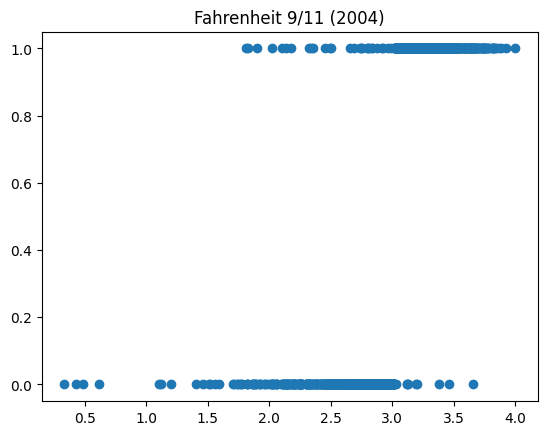

In [31]:
plt.scatter(df_movie_select.X, df_movie_select.median_split_Fahrenheit)
plt.title("Fahrenheit 9/11 (2004)")

Text(0.5, 1.0, 'Happy Gilmore (1996)')

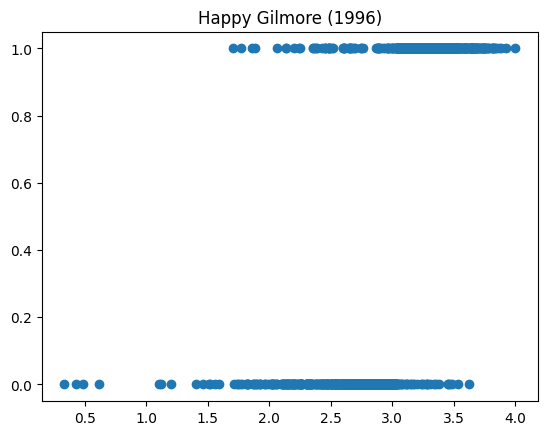

In [32]:
plt.scatter(df_movie_select.X, df_movie_select.median_split_HappyGilmore)
plt.title("Happy Gilmore (1996)")

Text(0.5, 1.0, 'Diamonds are Forever (1971)')

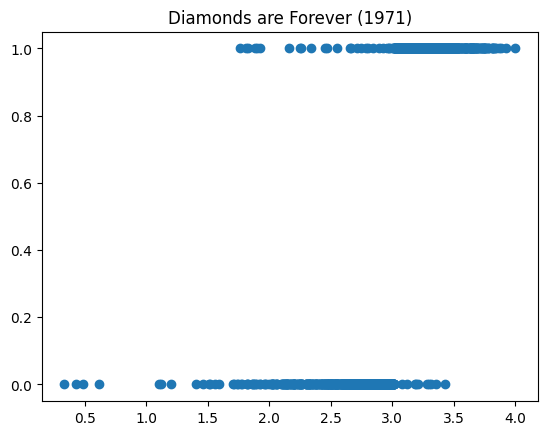

In [33]:
plt.scatter(df_movie_select.X, df_movie_select.median_split_DiamondsareForever)
plt.title("Diamonds are Forever (1971)")

Text(0.5, 1.0, 'Scream (1996)')

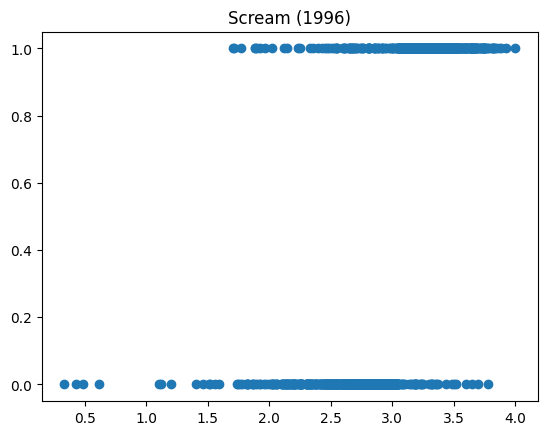

In [34]:
plt.scatter(df_movie_select.X, df_movie_select.median_split_Scream)
plt.title("Scream (1996)")

In [100]:
def k_fold_cv_train(X_train, y_train, num_folds = 5, test_size=0.2):
    """
    Performs a k-fold validation backed training loop. Returns the best model.
    """
    best_model = None
    best_score = 0

    #CV training
    for fold in range(num_folds):
        model = LogisticRegression(random_state=16)
        
        # Split the data into training and validation sets for this fold
        X_train_fold, X_val_fold, y_train_fold, y_val_fold = train_test_split(X_train, y_train, test_size=test_size, random_state=fold)
        
        # Fit the model on the training data for this fold
        model.fit(X_train_fold.values.reshape(-1, 1), y_train_fold)
        
        # Calculate the accuracy on the validation set for this fold
        score = model.score(X_val_fold.values.reshape(-1, 1), y_val_fold)
        
        # Check if this fold has the best performance
        if score > best_score:
            best_score = score
            best_model = model
    
    return best_model


## Fahrenheit 9/11 (2004)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(df_movie_select.X, df_movie_select.median_split_Fahrenheit, test_size=0.25, random_state=16)

In [102]:
logreg = k_fold_cv_train(X_train, y_train)

y_pred = logreg.predict(X_test.values.reshape(-1, 1))

In [103]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [104]:
np.sum(y_train)/len(y_train)

0.5060827250608273

In [105]:
# import the metrics class
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[137,   5],
       [  4, 128]])

beta_1:  [[6.59987074]] beta_0:  [-19.81486968]


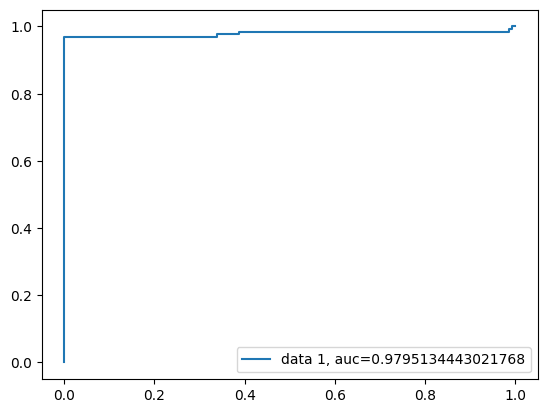

In [106]:
y_pred_proba = logreg.predict_proba(X_test.values.reshape(-1, 1))[::,1]
print("beta_1: ", logreg.coef_, "beta_0: ", logreg.intercept_)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Happy Gilmore (1996)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df_movie_select.X, df_movie_select.median_split_HappyGilmore, test_size=0.25, random_state=16)

In [108]:
logreg = k_fold_cv_train(X_train, y_train)

y_pred = logreg.predict(X_test.values.reshape(-1, 1))

In [109]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [110]:
# import the metrics class


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[125,  13],
       [ 16, 120]])

beta_1:  [[4.84361054]] beta_0:  [-14.53556086]


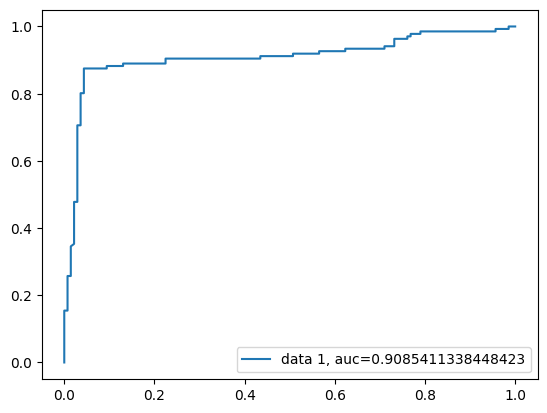

In [111]:
y_pred_proba = logreg.predict_proba(X_test.values.reshape(-1, 1))[::,1]
print("beta_1: ", logreg.coef_, "beta_0: ", logreg.intercept_)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Diamonds are Forever (1971)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df_movie_select.X, df_movie_select.median_split_DiamondsareForever, test_size=0.25, random_state=16)

In [113]:
logreg = k_fold_cv_train(X_train, y_train)

y_pred = logreg.predict(X_test.values.reshape(-1, 1))

In [114]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [115]:
# import the metrics class


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[137,   6],
       [  4, 127]])

beta_1:  [[6.50221468]] beta_0:  [-19.52334232]


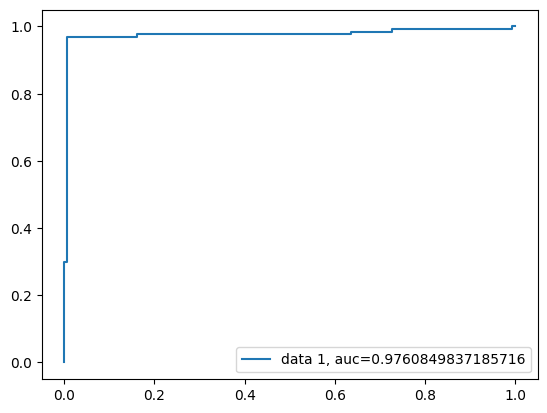

In [116]:
y_pred_proba = logreg.predict_proba(X_test.values.reshape(-1, 1))[::,1]
print("beta_1: ", logreg.coef_, "beta_0: ", logreg.intercept_)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Scream (1996)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(df_movie_select.X, df_movie_select.median_split_Scream, test_size=0.25, random_state=16)

In [118]:
logreg = k_fold_cv_train(X_train, y_train)

y_pred = logreg.predict(X_test.values.reshape(-1, 1))

In [119]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [120]:
# import the metrics class


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  15],
       [ 23, 117]])

beta_1:  [[4.17129908]] beta_0:  [-12.54547905]


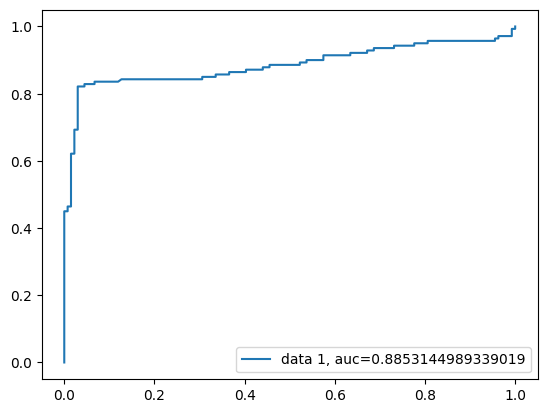

In [121]:
y_pred_proba = logreg.predict_proba(X_test.values.reshape(-1, 1))[::,1]
print("beta_1: ", logreg.coef_, "beta_0: ", logreg.intercept_)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()